In [1]:
import os
from collections import defaultdict
import cv2

def dataset_analysis(path):
    subfolders = os.listdir(path)

    for subfolder in subfolders:
        subfolder_path = os.path.join(path, subfolder)
        if os.path.isdir(subfolder_path):
            files = os.listdir(subfolder_path)
            format_dimensions_counts = defaultdict(lambda: defaultdict(int))

            for file in files:
                try:
                    file_path = os.path.join(subfolder_path, file)
                    img = cv2.imread(file_path)
                    if img is not None:
                        image_type = file.split('.')[-1].upper() #format
                        image_dimensions = (img.shape[1], img.shape[0])  # width, height
                        format_dimensions_counts[image_type][image_dimensions] += 1
                    else:
                        print(f"Error opening '{file}' in '{subfolder}': Unable to read image.")
                except Exception as e:
                    print(f"Exception processing '{file}' in '{subfolder}': {e}")

            print(f"Subfolder '{subfolder}' contains ({len(files)}):")
            for format, dimensions_counts in format_dimensions_counts.items():
                print(f"- {sum(dimensions_counts.values())} images of format {format}:")
                for dimensions, count in dimensions_counts.items():
                    print(f"  - {count} images with dimensions {dimensions}")

dataset_path = '/kaggle/input/eye-diseases-classification/dataset'
dataset_analysis(dataset_path)

Subfolder 'glaucoma' contains (1007):
- 906 images of format JPG:
  - 306 images with dimensions (512, 512)
  - 600 images with dimensions (256, 256)
- 101 images of format PNG:
  - 74 images with dimensions (2592, 1728)
  - 22 images with dimensions (2464, 1632)
  - 5 images with dimensions (1848, 1224)
Subfolder 'normal' contains (1074):
- 1074 images of format JPG:
  - 1074 images with dimensions (512, 512)
Subfolder 'diabetic_retinopathy' contains (1098):
- 1098 images of format JPEG:
  - 1098 images with dimensions (512, 512)
Subfolder 'cataract' contains (1038):
- 938 images of format JPG:
  - 640 images with dimensions (256, 256)
  - 298 images with dimensions (512, 512)
- 100 images of format PNG:
  - 19 images with dimensions (2464, 1632)
  - 5 images with dimensions (1848, 1224)
  - 76 images with dimensions (2592, 1728)


In [2]:
import os
import csv

# Path to save the CSV file
csv_file_path = '/kaggle/working/dataset.csv'

# List to store image paths and labels
data = []

# Iterate over the folders in the dataset
for label in os.listdir(dataset_path):
    label_folder = os.path.join(dataset_path, label)
    # Check if the item is a directory
    if os.path.isdir(label_folder):
        # Iterate over the images in the folder
        for image_name in os.listdir(label_folder):
            # Construct the image path
            image_path = os.path.join(label_folder, image_name)
            # Append the image path and label to the data list
            data.append([image_path, label])

# Write the data to a new CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'label'])  # Write header
    writer.writerows(data)

print(f"CSV file saved at: {csv_file_path}")

CSV file saved at: /kaggle/working/dataset.csv


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = '/kaggle/working/dataset.csv'
data = pd.read_csv(path)

train_data, temp_data = train_test_split(data, test_size=0.1, random_state=4, stratify=data['label'])

# Split the temp_data into validation and test sets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=4, stratify=temp_data['label'])

# Save the split datasets to CSV files
train_data.to_csv('/kaggle/working/train.csv', index=False)
val_data.to_csv('/kaggle/working/val.csv', index=False)
test_data.to_csv('/kaggle/working/test.csv', index=False)

print("Datasets split and saved successfully.")


Datasets split and saved successfully.


In [4]:
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import cv2
# import os
# import numpy as np
# import torchvision.transforms as transforms

# def preprocess_image(image_path, model_name):
#     try:
#         # Read the image
#         img = cv2.imread(image_path)
#         if img is None:
#             raise Exception(f"Error opening '{image_path}': Unable to read image.")

#         # Define the target size based on the model
#         if model_name == 'vgg':
#             target_size = (224, 224)
#         elif model_name == 'resnet':
#             target_size = (224, 224)  # ResNet also uses 224x224 input size
#         else:
#             raise ValueError(f"Unknown model '{model_name}'.")

#         # Resize the image
#         img_resized = cv2.resize(img, target_size)

#         # Convert the image to PyTorch tensor and normalize
#         transform = transforms.Compose([
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#         ])
#         img_tensor = transform(img_resized)

#         return img_tensor
#     except Exception as e:
#         print(f"Exception processing '{image_path}': {e}")
#         return None

# limit=4217

# # Preprocess the first 64 images in the train set
# train_images = []
# train_labels = []
# for _, row in train_data.iterrows():
#     if len(train_images) >= limit:
#         break
#     image_path = row['image_path']
#     label = row['label']
#     img_tensor = preprocess_image(image_path, model_name='vgg')  # Assuming VGG model for preprocessing
#     if img_tensor is not None:
#         train_images.append(img_tensor)
#         train_labels.append(label)

# # Preprocess the first 64 images in the validation set
# val_images = []
# val_labels = []
# for _, row in val_data.iterrows():
#     if len(val_images) >= limit:
#         break
#     image_path = row['image_path']
#     label = row['label']
#     img_tensor = preprocess_image(image_path, model_name='vgg')  # Assuming VGG model for preprocessing
#     if img_tensor is not None:
#         val_images.append(img_tensor)
#         val_labels.append(label)

# # Preprocess the first 64 images in the test set
# test_images = []
# test_labels = []
# for _, row in test_data.iterrows():
#     if len(test_images) >= limit:
#         break
#     image_path = row['image_path']
#     label = row['label']
#     img_tensor = preprocess_image(image_path, model_name='vgg')  # Assuming VGG model for preprocessing
#     if img_tensor is not None:
#         test_images.append(img_tensor)
#         test_labels.append(label)

# # Convert the lists to NumPy arrays
# train_images = np.array(train_images)
# val_images = np.array(val_images)
# test_images = np.array(test_images)
# train_labels = np.array(train_labels)
# val_labels = np.array(val_labels)
# test_labels = np.array(test_labels)

# print("Preprocessing completed.")
# print("Train images shape:", train_images.shape)
# print("Validation images shape:", val_images.shape)
# print("Test images shape:", test_images.shape)
# print("Train labels shape:", train_labels.shape)
# print("Validation labels shape:", val_labels.shape)
# print("Test labels shape:", test_labels.shape)

In [5]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.metrics import accuracy_score
# import numpy as np
# import torchvision.transforms as transforms
# import torchvision.models as models

# # Check if CUDA is available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Define the batch size and number of epochs
# batch_size = 64
# num_epochs = 15

# # Convert labels to numeric format
# label_map = {label: i for i, label in enumerate(np.unique(train_labels))}
# train_labels_numeric = np.array([label_map[label] for label in train_labels])
# test_labels_numeric = np.array([label_map[label] for label in test_labels])
# val_labels_numeric = np.array([label_map[label] for label in val_labels])

# # Convert the NumPy arrays to PyTorch tensors
# train_dataset = TensorDataset(torch.from_numpy(train_images), torch.from_numpy(train_labels_numeric))
# val_dataset = TensorDataset(torch.from_numpy(val_images), torch.from_numpy(val_labels_numeric))
# test_dataset = TensorDataset(torch.from_numpy(test_images), torch.from_numpy(test_labels_numeric))

# # Create data loaders
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# # Define the VGG16 model
# class VGG16(nn.Module):
#     def __init__(self, num_classes, pretrained=True):
#         super(VGG16, self).__init__()
#         self.features = models.vgg16(pretrained=pretrained).features
#         self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
#         self.classifier = nn.Sequential(
#             nn.Linear(512 * 7 * 7, 512),
#             nn.ReLU(True),
#             nn.Dropout(0.2),
#             nn.Linear(512, num_classes),
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.classifier(x)
#         return x

# # Initialize the VGG16 model
# num_classes = 4
# vgg_model = VGG16(num_classes, pretrained=True).to(device)
# def evaluate_model(model, loader):
#     model.eval()
#     predictions = []
#     true_labels = []
#     with torch.no_grad():
#         for images, labels in loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             predictions.extend(predicted.cpu().numpy())
#             true_labels.extend(labels.cpu().numpy())
#     accuracy = accuracy_score(true_labels, predictions)
#     return accuracy
# # Freeze the parameters of the pre-trained model
# for param in vgg_model.parameters():
#     param.requires_grad = False

# # Enable gradient computation for the parameters of the final fully connected layer
# for param in vgg_model.classifier.parameters():
#     param.requires_grad = True

# # Define the loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# # Only optimize the parameters of the final fully connected layer
# optimizer = optim.Adam(vgg_model.classifier.parameters(), lr=0.001)

# # Training loop
# for epoch in range(num_epochs):
#     vgg_model.train()
#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = vgg_model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#     # Evaluate the model on the validation set
#     vgg_val_accuracy = evaluate_model(vgg_model, val_loader)
#     print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {vgg_val_accuracy:.4f}")

# # Evaluate the model on the test set
# vgg_test_accuracy = evaluate_model(vgg_model, test_loader)
# print(f"VGG16 Test Accuracy: {vgg_test_accuracy}")


In [6]:
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

limit = 4217

# Function to preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        # Read the image
        img = cv2.imread(image_path)
        if img is None:
            raise Exception(f"Error opening '{image_path}': Unable to read image.")
        
        # Resize the image
        img_resized = tf.image.resize(img, target_size)
        
        # Normalize the image
        img_resized = img_resized / 255.0  # Rescale pixel values to [0, 1]

        return img_resized
    except Exception as e:
        print(f"Exception processing '{image_path}': {e}")
        return None

# Preprocess images in train, validation, and test sets
train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []

for _, row in train_data.iterrows():
    if len(train_images) >= limit:
        break
    image_path = row['image_path']
    label = row['label']
    img_processed = preprocess_image(image_path)
    if img_processed is not None:
        train_images.append(img_processed)
        train_labels.append(label)

for _, row in val_data.iterrows():
    if len(val_images) >= limit:
        break
    image_path = row['image_path']
    label = row['label']
    img_processed = preprocess_image(image_path)
    if img_processed is not None:
        val_images.append(img_processed)
        val_labels.append(label)

for _, row in test_data.iterrows():
    if len(test_images) >= limit:
        break
    image_path = row['image_path']
    label = row['label']
    img_processed = preprocess_image(image_path)
    if img_processed is not None:
        test_images.append(img_processed)
        test_labels.append(label)

# Convert lists to NumPy arrays
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

print("Preprocessing completed.")
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)
# 

2024-02-27 00:19:47.831883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 00:19:47.831981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 00:19:47.983137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Preprocessing completed.
Train images shape: (3795, 224, 224, 3)
Validation images shape: (211, 224, 224, 3)
Test images shape: (211, 224, 224, 3)
Train labels shape: (3795,)
Validation labels shape: (211,)
Test labels shape: (211,)


In [7]:
loss=[]
acc=[]

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import accuracy_score
import numpy as np

# Define the VGG16 model with trainable parameters set to False
def VGG16(num_classes, pretrained=True):
    base_model = tf.keras.applications.VGG16(weights='imagenet' if pretrained else None, include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Set trainable parameters to False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),# Additional Dropout layer
        layers.Dense(num_classes)
    ])
    return model


# Convert labels to integers
label_map = {label: i for i, label in enumerate(np.unique(train_labels))}
train_labels_encoded = np.array([label_map[label] for label in train_labels])
val_labels_encoded = np.array([label_map[label] for label in val_labels])
test_labels_encoded = np.array([label_map[label] for label in test_labels])

# Convert NumPy arrays to TensorFlow tensors
train_images_tf = tf.convert_to_tensor(train_images)
val_images_tf = tf.convert_to_tensor(val_images)
test_images_tf = tf.convert_to_tensor(test_images)
train_labels_tf = tf.convert_to_tensor(train_labels_encoded, dtype=tf.int64)
val_labels_tf = tf.convert_to_tensor(val_labels_encoded, dtype=tf.int64)
test_labels_tf = tf.convert_to_tensor(test_labels_encoded, dtype=tf.int64)

# Define the VGG16 model
num_classes = 4
vgg_model = VGG16(num_classes, pretrained=True)

def evaluate_model(model, images, labels, criterion):
    predictions = []
    true_labels = []
    losses = []
    for i in range(images.shape[0]):
        outputs = model(images[i:i+1])
        loss = criterion(labels[i:i+1], outputs)
        predicted = tf.argmax(outputs, axis=1)
        predictions.append(predicted.numpy()[0])
        true_labels.append(labels[i].numpy())
        losses.append(loss.numpy())
    accuracy = accuracy_score(true_labels, predictions)
    average_loss = np.mean(losses)
    return accuracy, average_loss

# Define the loss function and optimizer
criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = optimizers.Adam(learning_rate=0.01)

# Training loop
batch_size = 64
num_epochs = 15
a=[]
l=[]
for epoch in range(num_epochs):
    for i in range(0, len(train_images), batch_size):
        images = train_images_tf[i:i+batch_size]
        labels = train_labels_tf[i:i+batch_size]
        with tf.GradientTape() as tape:
            outputs = vgg_model(images, training=True)
            loss = criterion(labels, outputs)

        gradients = tape.gradient(loss, vgg_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, vgg_model.trainable_variables))

    # Evaluate the model on the validation set
    vgg_val_accuracy, val_loss = evaluate_model(vgg_model, val_images_tf, val_labels_tf,criterion)
    a.append(vgg_val_accuracy)
    l.append(val_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {vgg_val_accuracy:.4f}")
    
# Evaluate the model on the test set


58889256/58889256 [==============================] - 2s 0us/step


I0000 00:00:1708993277.643886      34 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch [1/15], Validation Accuracy: 0.7014
Epoch [2/15], Validation Accuracy: 0.7630
Epoch [3/15], Validation Accuracy: 0.7820
Epoch [4/15], Validation Accuracy: 0.8104
Epoch [5/15], Validation Accuracy: 0.8152
Epoch [6/15], Validation Accuracy: 0.8057
Epoch [7/15], Validation Accuracy: 0.8246
Epoch [8/15], Validation Accuracy: 0.8341
Epoch [9/15], Validation Accuracy: 0.8294
Epoch [10/15], Validation Accuracy: 0.8246
Epoch [11/15], Validation Accuracy: 0.8294
Epoch [12/15], Validation Accuracy: 0.8436
Epoch [13/15], Validation Accuracy: 0.8009
Epoch [14/15], Validation Accuracy: 0.8199
Epoch [15/15], Validation Accuracy: 0.8483


In [9]:
loss1=[]
acc=[]

In [10]:
acc.append(a)
loss1.append(l)
vgg_test_accuracy = evaluate_model(vgg_model, test_images_tf, test_labels_tf,criterion)
print(f"VGG16 Test Accuracy: {vgg_test_accuracy}")

print(acc)

VGG16 Test Accuracy: (0.8578199052132701, 0.36928746)
[[0.7014218009478673, 0.7630331753554502, 0.7819905213270142, 0.8104265402843602, 0.8151658767772512, 0.8056872037914692, 0.8246445497630331, 0.8341232227488151, 0.8293838862559242, 0.8246445497630331, 0.8293838862559242, 0.8436018957345972, 0.8009478672985783, 0.8199052132701422, 0.8483412322274881]]


In [11]:
# import tensorflow as tf
# from tensorflow.keras import layers, models, optimizers
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Define the ResNet50 model with trainable parameters set to False
# def ResNet50(num_classes, pretrained=True):
#     base_model = tf.keras.applications.ResNet50(weights='imagenet' if pretrained else None, include_top=False, input_shape=(224, 224, 3))
#     base_model.trainable = False  # Set trainable parameters to False
#     model = models.Sequential([
#         base_model,
#         layers.GlobalAveragePooling2D(),
#         layers.Dense(128, activation='relu'),
#         layers.Dropout(0.5),# Additional Dropout layer
#         layers.Dense(64, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(32, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(16, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes)
#     ])
#     return model



# # Convert labels to integers
# label_map = {label: i for i, label in enumerate(np.unique(train_labels))}
# train_labels_encoded = np.array([label_map[label] for label in train_labels])
# val_labels_encoded = np.array([label_map[label] for label in val_labels])
# test_labels_encoded = np.array([label_map[label] for label in test_labels])

# # Convert NumPy arrays to TensorFlow tensors
# train_images_tf = tf.convert_to_tensor(train_images)
# val_images_tf = tf.convert_to_tensor(val_images)
# test_images_tf = tf.convert_to_tensor(test_images)
# train_labels_tf = tf.convert_to_tensor(train_labels_encoded, dtype=tf.int64)
# val_labels_tf = tf.convert_to_tensor(val_labels_encoded, dtype=tf.int64)
# test_labels_tf = tf.convert_to_tensor(test_labels_encoded, dtype=tf.int64)

# a=[]
# l=[]
# # Define the ResNet50 model
# num_classes = 4
# resnet_model = ResNet50(num_classes, pretrained=True)

# def evaluate_model(model, images, labels, criterion):
#     predictions = []
#     true_labels = []
#     losses = []
#     for i in range(images.shape[0]):
#         outputs = model(images[i:i+1])
#         loss = criterion(labels[i:i+1], outputs)
#         predicted = tf.argmax(outputs, axis=1)
#         predictions.append(predicted.numpy()[0])
#         true_labels.append(labels[i].numpy())
#         losses.append(loss.numpy())
#     accuracy = accuracy_score(true_labels, predictions)
#     average_loss = np.mean(losses)
#     return accuracy, average_loss

# # Define the loss function and optimizer
# criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# optimizer = optimizers.Adam(learning_rate=0.001)

# # Training loop
# batch_size = 64
# num_epochs = 15

# for epoch in range(num_epochs):
#     for i in range(0, len(train_images), batch_size):
#         images = train_images_tf[i:i+batch_size]
#         labels = train_labels_tf[i:i+batch_size]
#         with tf.GradientTape() as tape:
#             outputs = resnet_model(images, training=True)
#             loss = criterion(labels, outputs)

#         gradients = tape.gradient(loss, resnet_model.trainable_variables)
#         optimizer.apply_gradients(zip(gradients, resnet_model.trainable_variables))

#     # Evaluate the model on the validation set
#     resnet_val_accuracy, val_loss = evaluate_model(resnet_model, val_images_tf, val_labels_tf,criterion)
#     a.append(resnet_val_accuracy)
#     l.append(val_loss)
#     print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {resnet_val_accuracy:.4f}")

# # Evaluate the model on the test set
# acc.append(a)
# loss1.append(l)
# resnet_test_accuracy = evaluate_model(resnet_model, test_images_tf, test_labels_tf,criterion)
# print(f"ResNet50 Test Accuracy: {resnet_test_accuracy}")


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import accuracy_score
import numpy as np

# Define the MobileNet model with trainable parameters set to False
def MobileNet(num_classes, pretrained=True):
    base_model = tf.keras.applications.MobileNet(weights='imagenet' if pretrained else None, include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Set trainable parameters to False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),# Additional Dropout layer
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes)
    ])
    return model

# Convert labels to integers
label_map = {label: i for i, label in enumerate(np.unique(train_labels))}
train_labels_encoded = np.array([label_map[label] for label in train_labels])
val_labels_encoded = np.array([label_map[label] for label in val_labels])
test_labels_encoded = np.array([label_map[label] for label in test_labels])

# Convert NumPy arrays to TensorFlow tensors
train_images_tf = tf.convert_to_tensor(train_images)
val_images_tf = tf.convert_to_tensor(val_images)
test_images_tf = tf.convert_to_tensor(test_images)
train_labels_tf = tf.convert_to_tensor(train_labels_encoded, dtype=tf.int64)
val_labels_tf = tf.convert_to_tensor(val_labels_encoded, dtype=tf.int64)
test_labels_tf = tf.convert_to_tensor(test_labels_encoded, dtype=tf.int64)

a=[]
l=[]
# Define the MobileNet model
num_classes = 4
mobilenet_model = MobileNet(num_classes, pretrained=True)

def evaluate_model(model, images, labels, criterion):
    predictions = []
    true_labels = []
    losses = []
    for i in range(images.shape[0]):
        outputs = model(images[i:i+1])
        loss = criterion(labels[i:i+1], outputs)
        predicted = tf.argmax(outputs, axis=1)
        predictions.append(predicted.numpy()[0])
        true_labels.append(labels[i].numpy())
        losses.append(loss.numpy())
    accuracy = accuracy_score(true_labels, predictions)
    average_loss = np.mean(losses)
    return accuracy, average_loss

# Define the loss function and optimizer
criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = optimizers.Adam(learning_rate=0.001)

# Training loop
batch_size = 64
num_epochs = 15

for epoch in range(num_epochs):
    for i in range(0, len(train_images), batch_size):
        images = train_images_tf[i:i+batch_size]
        labels = train_labels_tf[i:i+batch_size]
        with tf.GradientTape() as tape:
            outputs = mobilenet_model(images, training=True)
            loss = criterion(labels, outputs)

        gradients = tape.gradient(loss, mobilenet_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, mobilenet_model.trainable_variables))

    # Evaluate the model on the validation set
    mobilenet_val_accuracy, val_loss = evaluate_model(mobilenet_model, val_images_tf, val_labels_tf,criterion)
    a.append(mobilenet_val_accuracy)
    l.append(val_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {mobilenet_val_accuracy:.4f}")

# Evaluate the model on the test set
mobilenet_test_accuracy = evaluate_model(mobilenet_model, test_images_tf, test_labels_tf,criterion)
print(f"MobileNet Test Accuracy: {mobilenet_test_accuracy}")

acc.append(a)
loss1.append(l)

17225924/17225924 [==============================] - 1s 0us/step
Epoch [1/15], Validation Accuracy: 0.7867
Epoch [2/15], Validation Accuracy: 0.8152
Epoch [3/15], Validation Accuracy: 0.8578
Epoch [4/15], Validation Accuracy: 0.8531
Epoch [5/15], Validation Accuracy: 0.8531
Epoch [6/15], Validation Accuracy: 0.8673
Epoch [7/15], Validation Accuracy: 0.8673
Epoch [8/15], Validation Accuracy: 0.8720
Epoch [9/15], Validation Accuracy: 0.8768
Epoch [10/15], Validation Accuracy: 0.8815
Epoch [11/15], Validation Accuracy: 0.8863
Epoch [12/15], Validation Accuracy: 0.8673
Epoch [13/15], Validation Accuracy: 0.8768
Epoch [14/15], Validation Accuracy: 0.8910
Epoch [15/15], Validation Accuracy: 0.8815
MobileNet Test Accuracy: (0.9004739336492891, 0.2247863)


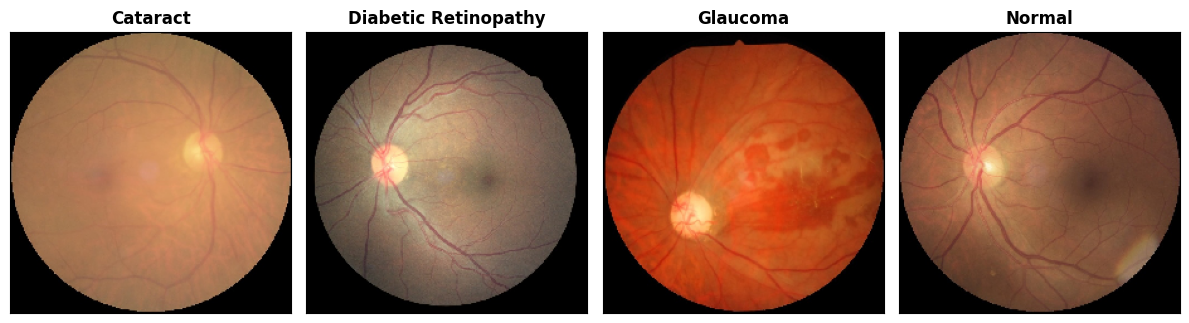

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

def display_images(images, titles):
    subplot_args = {
        'nrows': 1,
        'ncols': 4,
        'figsize': (12, 8),
        'subplot_kw': {'xticks': [], 'yticks': []}
    }

    fig, ax = plt.subplots(**subplot_args)

    for i in range(len(images)):
        ax[i].imshow(images[i])
        ax[i].set_title(titles[i], fontsize='large', fontweight='bold')

    plt.tight_layout()

#     plt.savefig('output.pdf', format='pdf', dpi=600, bbox_inches='tight')

    plt.show()

img1 = load_img('/kaggle/input/eye-diseases-classification/dataset/cataract/1102_right.jpg', target_size=(224, 224))
img2 = load_img('/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy/10003_left.jpeg', target_size=(224, 224))
img3 = load_img('/kaggle/input/eye-diseases-classification/dataset/glaucoma/1020_left.jpg', target_size=(224, 224))
img4 = load_img('/kaggle/input/eye-diseases-classification/dataset/normal/1034_left.jpg', target_size=(224, 224))

images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])
titles = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']

display_images(images, titles)

In [14]:
!

In [15]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
# from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize
# from vis.utils import utils
from tensorflow.keras.applications.vgg16 import decode_predictions
import json
import os
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# from patchify import patchify
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping
# import vit
import os
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, LearningRateScheduler

In [16]:
imgs = [img_to_array(img).reshape(1, 224, 224, 3) for img in [img1, img2, img3, img4]]

preprocessed_imgs = [preprocess_input(img) for img in imgs]

yhat1 = vgg_model(preprocessed_imgs[0])
yhat2 = vgg_model(preprocessed_imgs[1])
yhat3 = vgg_model(preprocessed_imgs[2])
yhat4 = vgg_model(preprocessed_imgs[3])

predictions = [yhat1,yhat2,yhat3,yhat4]

2024-02-27 00:52:16.744282: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'while/body/_1/while/Identity_3' -> 'while/next_iteration/_70'}.


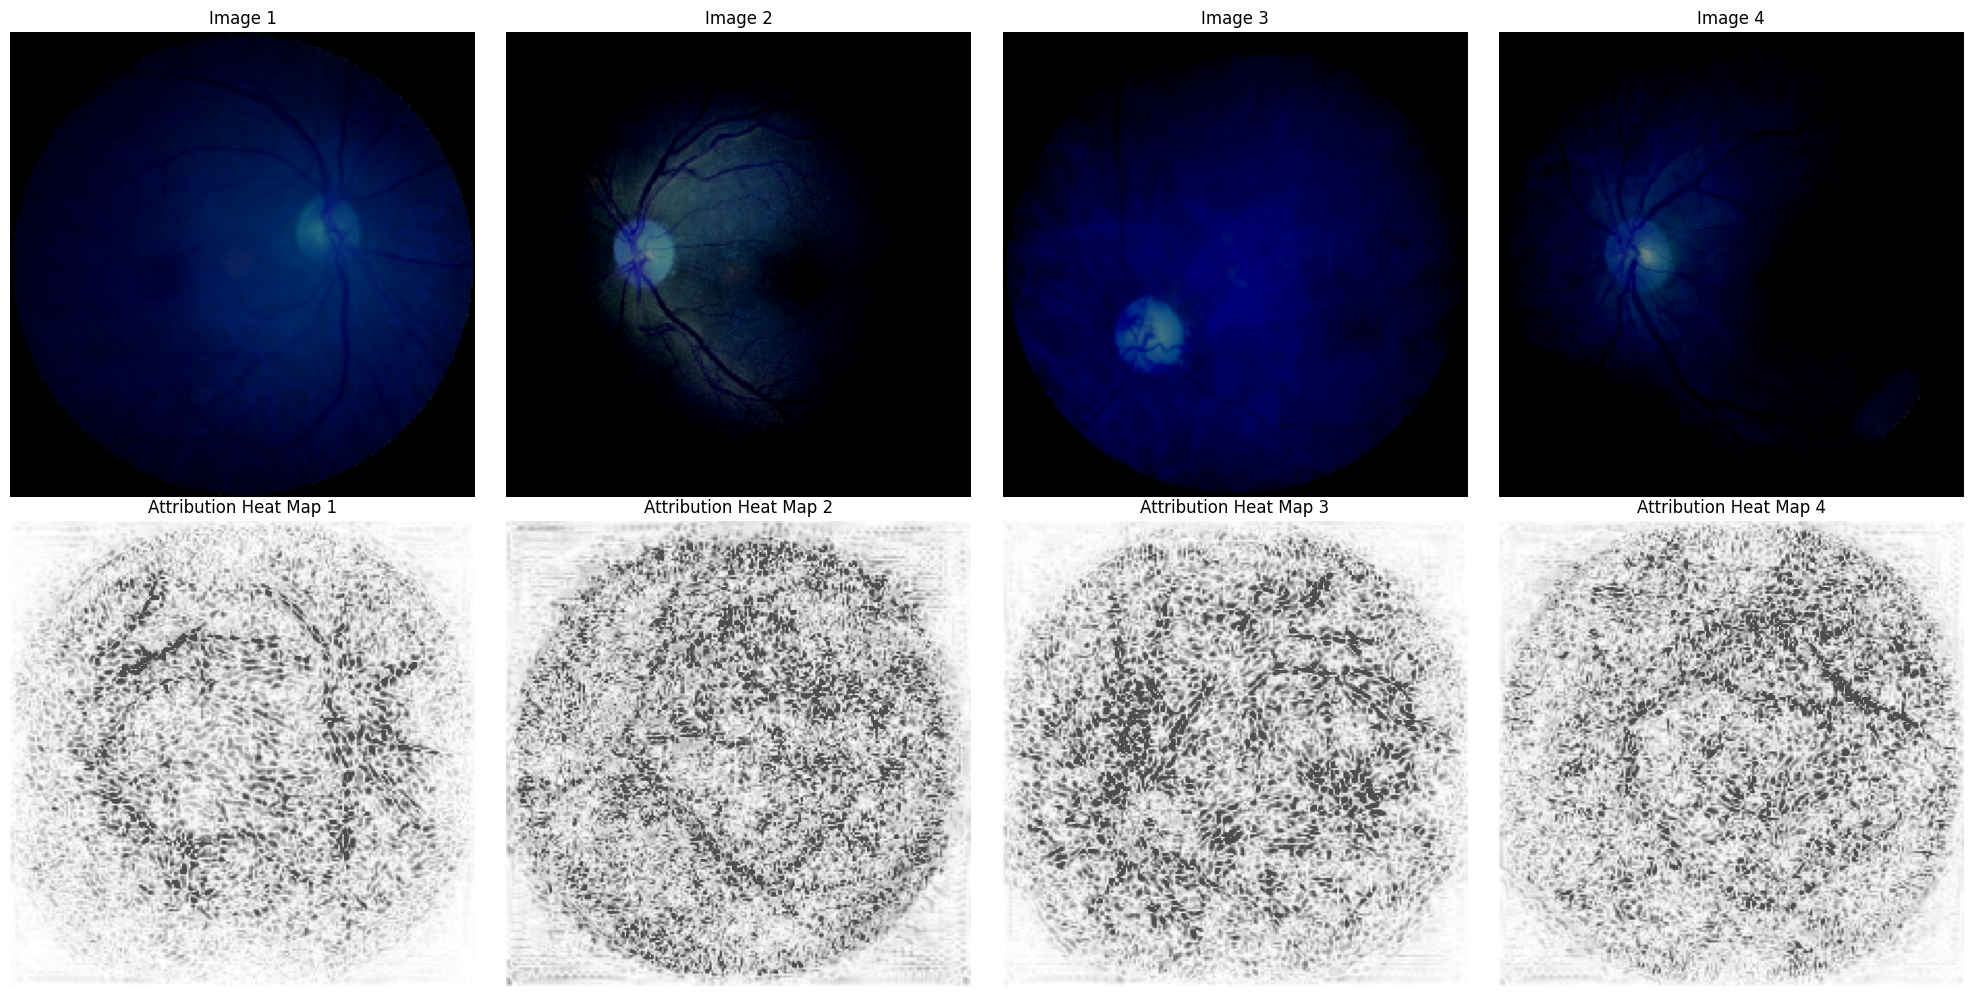

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.applications.resnet.preprocess_input(img_array)
    return img_array

@tf.function
def integrated_gradients(inputs, vgg_model, predicted_class):
    integrated_gradients = tf.zeros_like(inputs)
    baseline = tf.zeros_like(inputs)
    m_steps = 200  
    alphas = tf.linspace(0.0, 1.0, m_steps)

    for alpha in alphas:
        x_interpolated = baseline + alpha * (inputs - baseline)
        with tf.GradientTape() as tape:
            tape.watch(x_interpolated)
            logits = vgg_model(x_interpolated)
            predicted_class_logits = logits[0][predicted_class]
        gradient = tape.gradient(predicted_class_logits, x_interpolated)
        integrated_gradients += gradient / m_steps

    return integrated_gradients

default_cmap = LinearSegmentedColormap.from_list('custom blue',
                                                 [(0, '#ffffff'),
                                                  (0.25, '#000000'),
                                                  (1, '#000000')], N=256)

def visualize_attributions(img_path, vgg_model):
    img_array = preprocess_image(img_path)
    input_tensor = tf.convert_to_tensor(img_array)
    input_tensor = tf.expand_dims(input_tensor, axis=0)

    predictions = vgg_model(input_tensor)
    predicted_class = tf.argmax(predictions[0])
#     print('Predicted class:', predicted_class.numpy())

    attributions_ig = integrated_gradients(input_tensor, vgg_model, predicted_class)

    original_image = tf.cast(img_array, tf.uint8)

    attributions_ig = tf.reduce_sum(tf.abs(attributions_ig), axis=-1)
    attributions_ig = (attributions_ig - tf.reduce_min(attributions_ig)) / (tf.reduce_max(attributions_ig) - tf.reduce_min(attributions_ig))
    
    return original_image, attributions_ig

image_paths = ['/kaggle/input/eye-diseases-classification/dataset/cataract/1102_right.jpg', '/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy/10003_left.jpeg', '/kaggle/input/eye-diseases-classification/dataset/glaucoma/1020_left.jpg', '/kaggle/input/eye-diseases-classification/dataset/normal/1034_left.jpg']  

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, img_path in enumerate(image_paths):
    original_image, attributions_ig = visualize_attributions(img_path, vgg_model)

    # Display the images in the grid
    axs[0, i].imshow(original_image)
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Image {i+1}")

    axs[1, i].imshow(attributions_ig[0], cmap=default_cmap, alpha=0.7)
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Attribution Heat Map {i+1}")

plt.savefig('VGG.png', dpi=800)
plt.tight_layout()
plt.show()

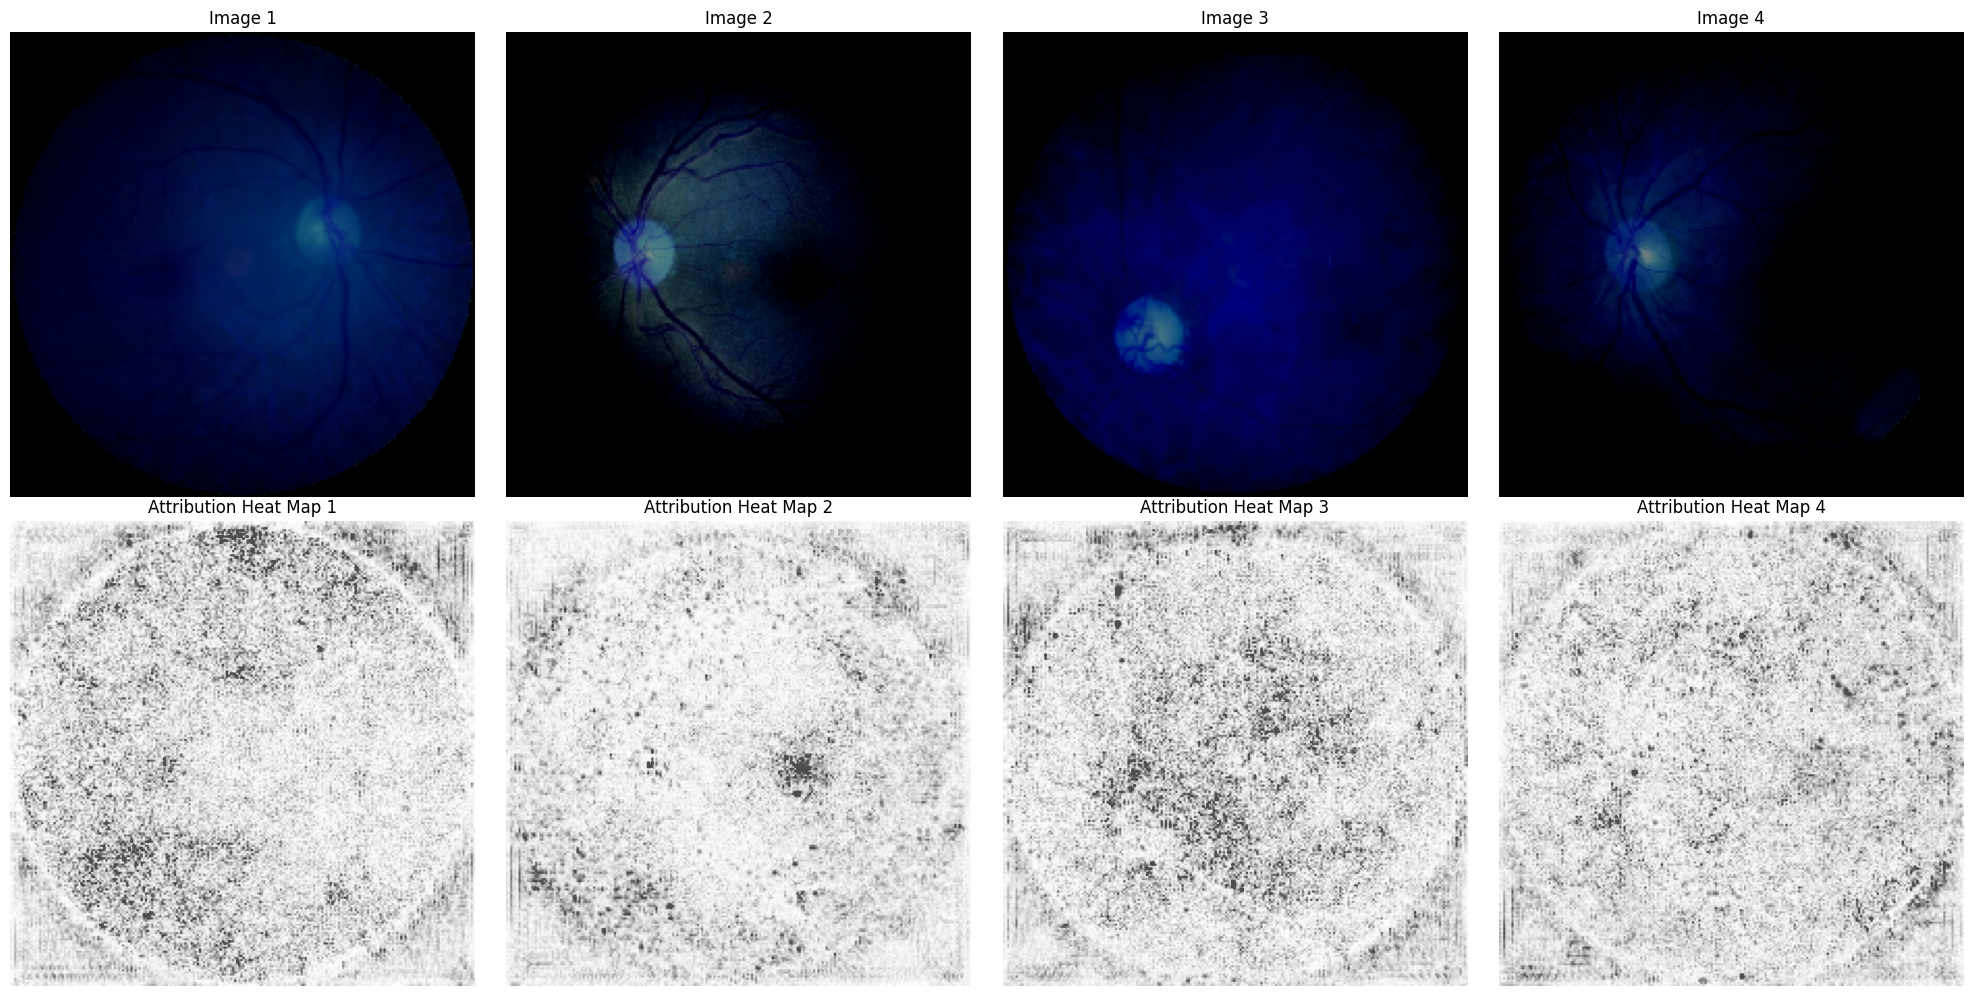

[]


In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.applications.resnet.preprocess_input(img_array)
    return img_array

@tf.function
def integrated_gradients(inputs, mobilenet_model, predicted_class):
    integrated_gradients = tf.zeros_like(inputs)
    baseline = tf.zeros_like(inputs)
    m_steps = 200  
    alphas = tf.linspace(0.0, 1.0, m_steps)

    for alpha in alphas:
        x_interpolated = baseline + alpha * (inputs - baseline)
        with tf.GradientTape() as tape:
            tape.watch(x_interpolated)
            logits = mobilenet_model(x_interpolated)
            predicted_class_logits = logits[0][predicted_class]
        gradient = tape.gradient(predicted_class_logits, x_interpolated)
        integrated_gradients += gradient / m_steps

    return integrated_gradients

default_cmap = LinearSegmentedColormap.from_list('custom blue',
                                                 [(0, '#ffffff'),
                                                  (0.25, '#000000'),
                                                  (1, '#000000')], N=256)

arr=[]
def visualize_attributions(img_path, mobilenet_model):
    img_array = preprocess_image(img_path)
    input_tensor = tf.convert_to_tensor(img_array)
    input_tensor = tf.expand_dims(input_tensor, axis=0)

    predictions = mobilenet_model(input_tensor)
    predicted_class = tf.argmax(predictions[0])
#     print('Predicted class:', predicted_class.numpy())
#     arr.append(predicted_class.numpy())
    attributions_ig = integrated_gradients(input_tensor, mobilenet_model, predicted_class)

    original_image = tf.cast(img_array, tf.uint8)

    attributions_ig = tf.reduce_sum(tf.abs(attributions_ig), axis=-1)
    attributions_ig = (attributions_ig - tf.reduce_min(attributions_ig)) / (tf.reduce_max(attributions_ig) - tf.reduce_min(attributions_ig))
    
    return original_image, attributions_ig

image_paths = ['/kaggle/input/eye-diseases-classification/dataset/cataract/1102_right.jpg', '/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy/10003_left.jpeg', '/kaggle/input/eye-diseases-classification/dataset/glaucoma/1020_left.jpg', '/kaggle/input/eye-diseases-classification/dataset/normal/1034_left.jpg']  

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, img_path in enumerate(image_paths):
    original_image, attributions_ig = visualize_attributions(img_path, mobilenet_model)

    # Display the images in the grid
    axs[0, i].imshow(original_image)
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Image {i+1}")

    axs[1, i].imshow(attributions_ig[0], cmap=default_cmap, alpha=0.7)
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Attribution Heat Map {i+1}")

plt.savefig('MobileNet_model.png', dpi=800)
plt.tight_layout()
plt.show()

print(arr)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

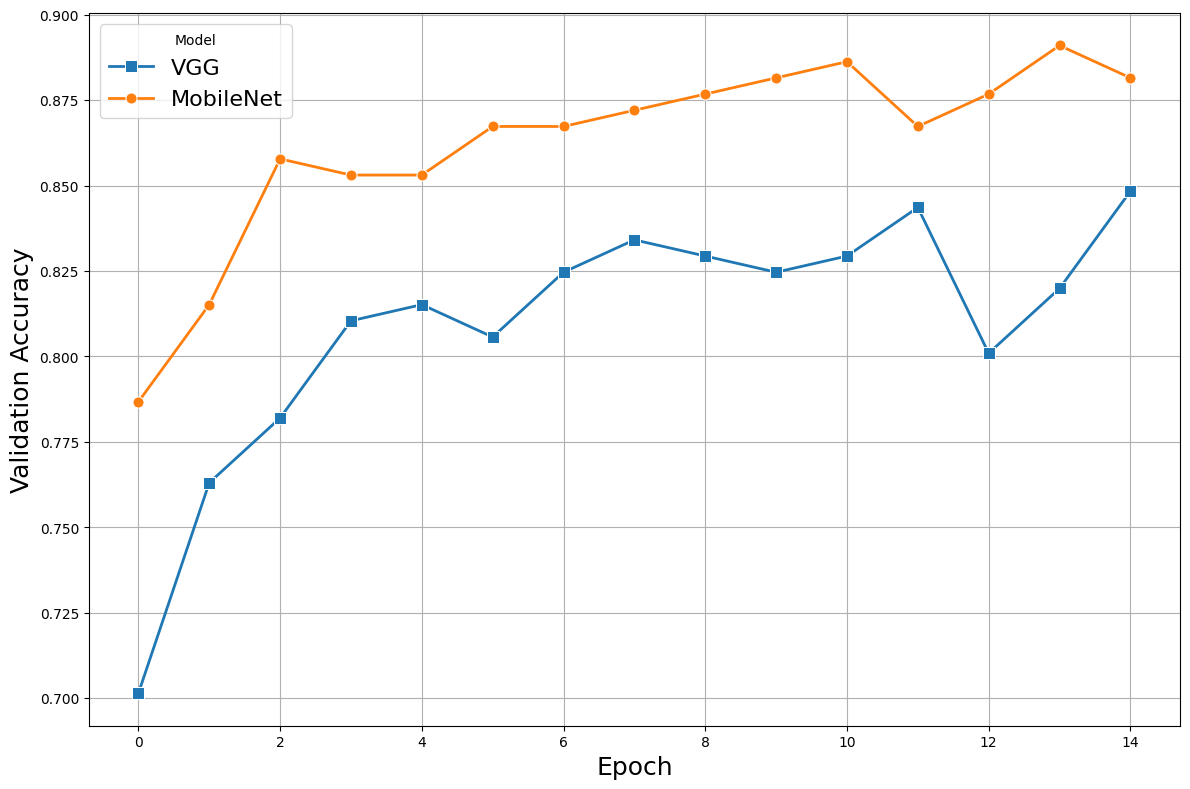

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Assuming acc is a list containing validation accuracies for VGG and ResNet
# acc[0] corresponds to VGG, acc[1] corresponds to ResNet
sns.lineplot(data=acc[0], label='VGG', marker='s', markersize=8, linewidth=2)
sns.lineplot(data=acc[1], label='MobileNet', marker='o', markersize=8, linewidth=2)

plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Validation Accuracy', fontsize=18)
plt.legend(title='Model', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.savefig('Validation_Accuracy_comparison.pdf', dpi=600)

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

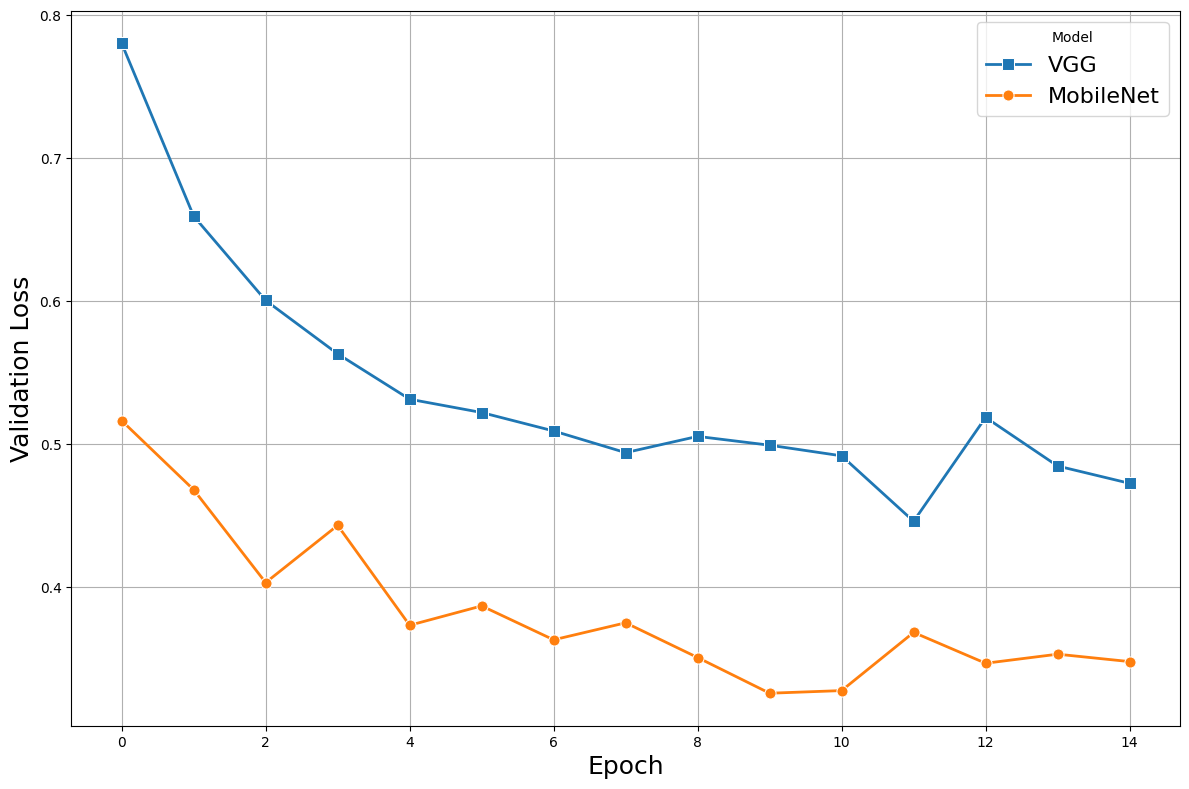

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Assuming acc is a list containing validation accuracies for VGG and ResNet
# acc[0] corresponds to VGG, acc[1] corresponds to ResNet
sns.lineplot(data=loss1[0], label='VGG', marker='s', markersize=8, linewidth=2)
sns.lineplot(data=loss1[1], label='MobileNet', marker='o', markersize=8, linewidth=2)

plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Validation Loss', fontsize=18)
plt.legend(title='Model', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.savefig('Validation_Loss_comparison.pdf', dpi=600)

plt.show()
